# Clustering Songs for Spotify Playlists

## 1. Getting Started with Spotify

The following Python code implements a clustering algorithm for creating Spotify playlists based on song features. The idea is to create a unique set of songs that are representative of various musical clusters.

Before we begin with clustering, let us take a look at how we can post chosen songs to Spotify. To begin, we'll need to navigate to [Spotify's Developer Website](https://developer.spotify.com/), register and hit the button to `Create app`. Give your app a name and brief description, and enter a `Redirect URI`.

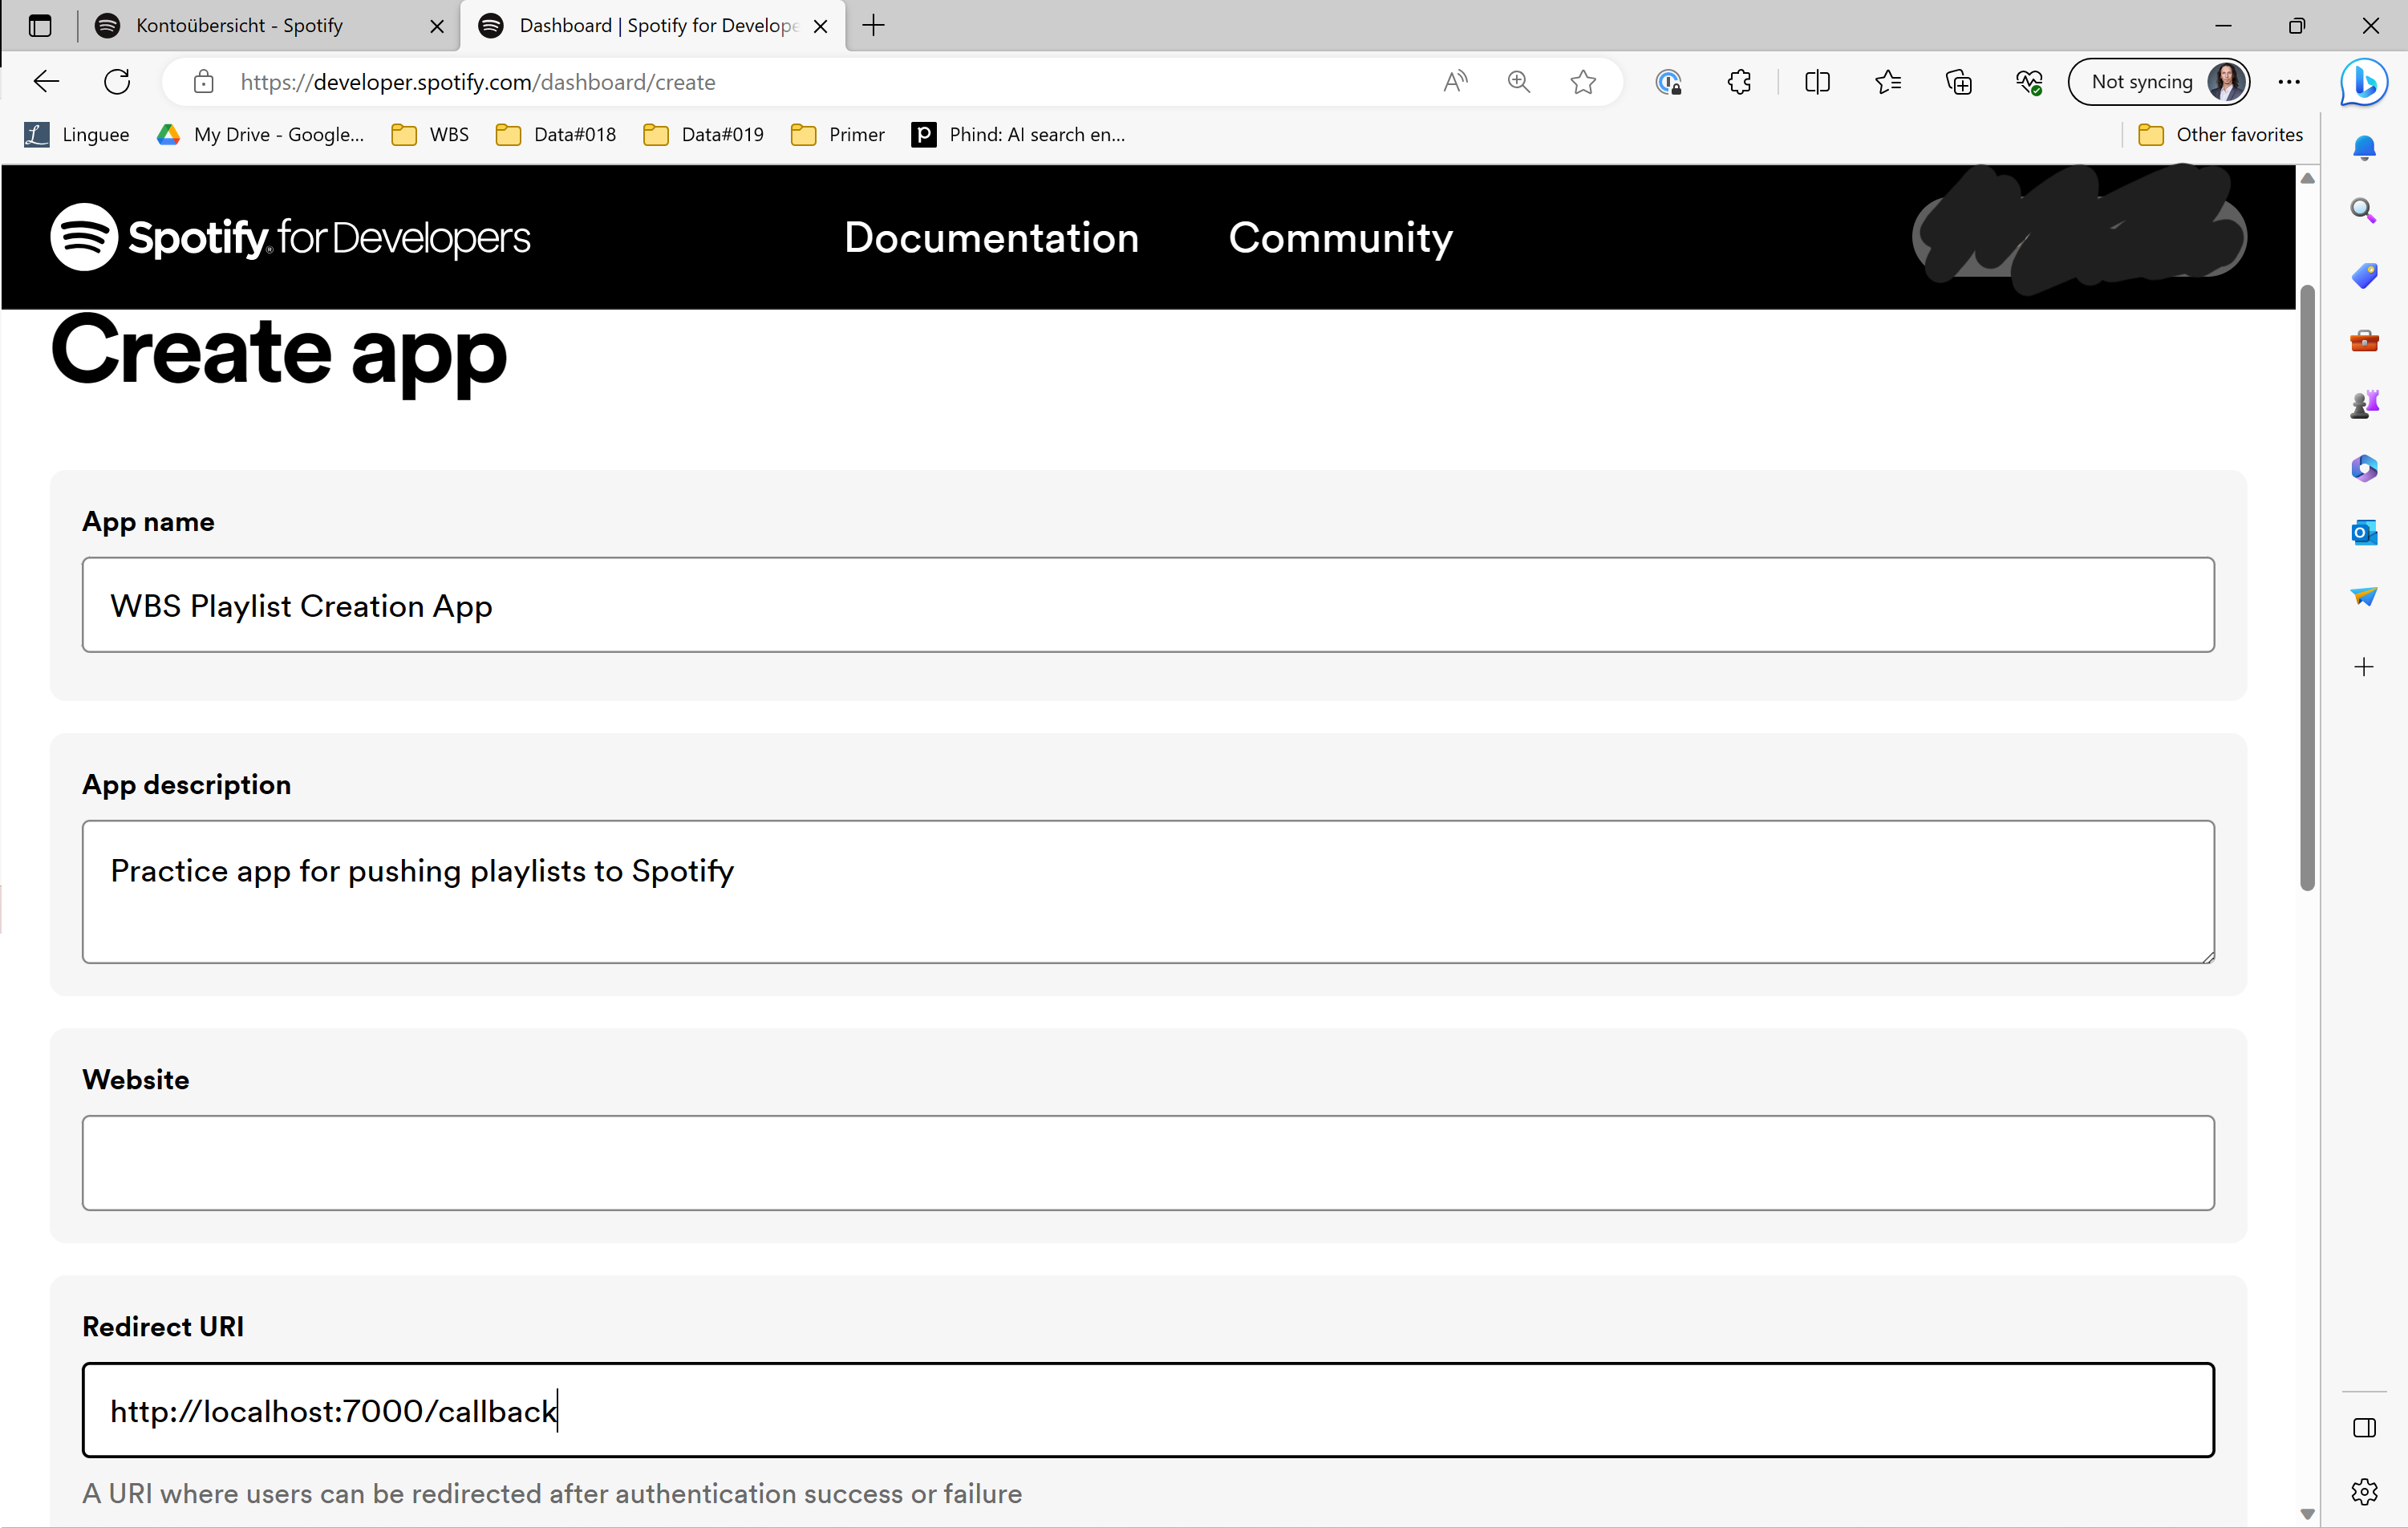

It might take multiple tries to find a `Redirect URI` that works. Other options include `localhost:8000` or `localhost:8888`. The important thing is that the host identified in the dashboard matches that in the code below. Agree to termns and conditions to move on.

From the Dashboard of this new app, we now need to go into the 'Settings' to copy the `Client ID` and `Client secret` (still hidden in this image).

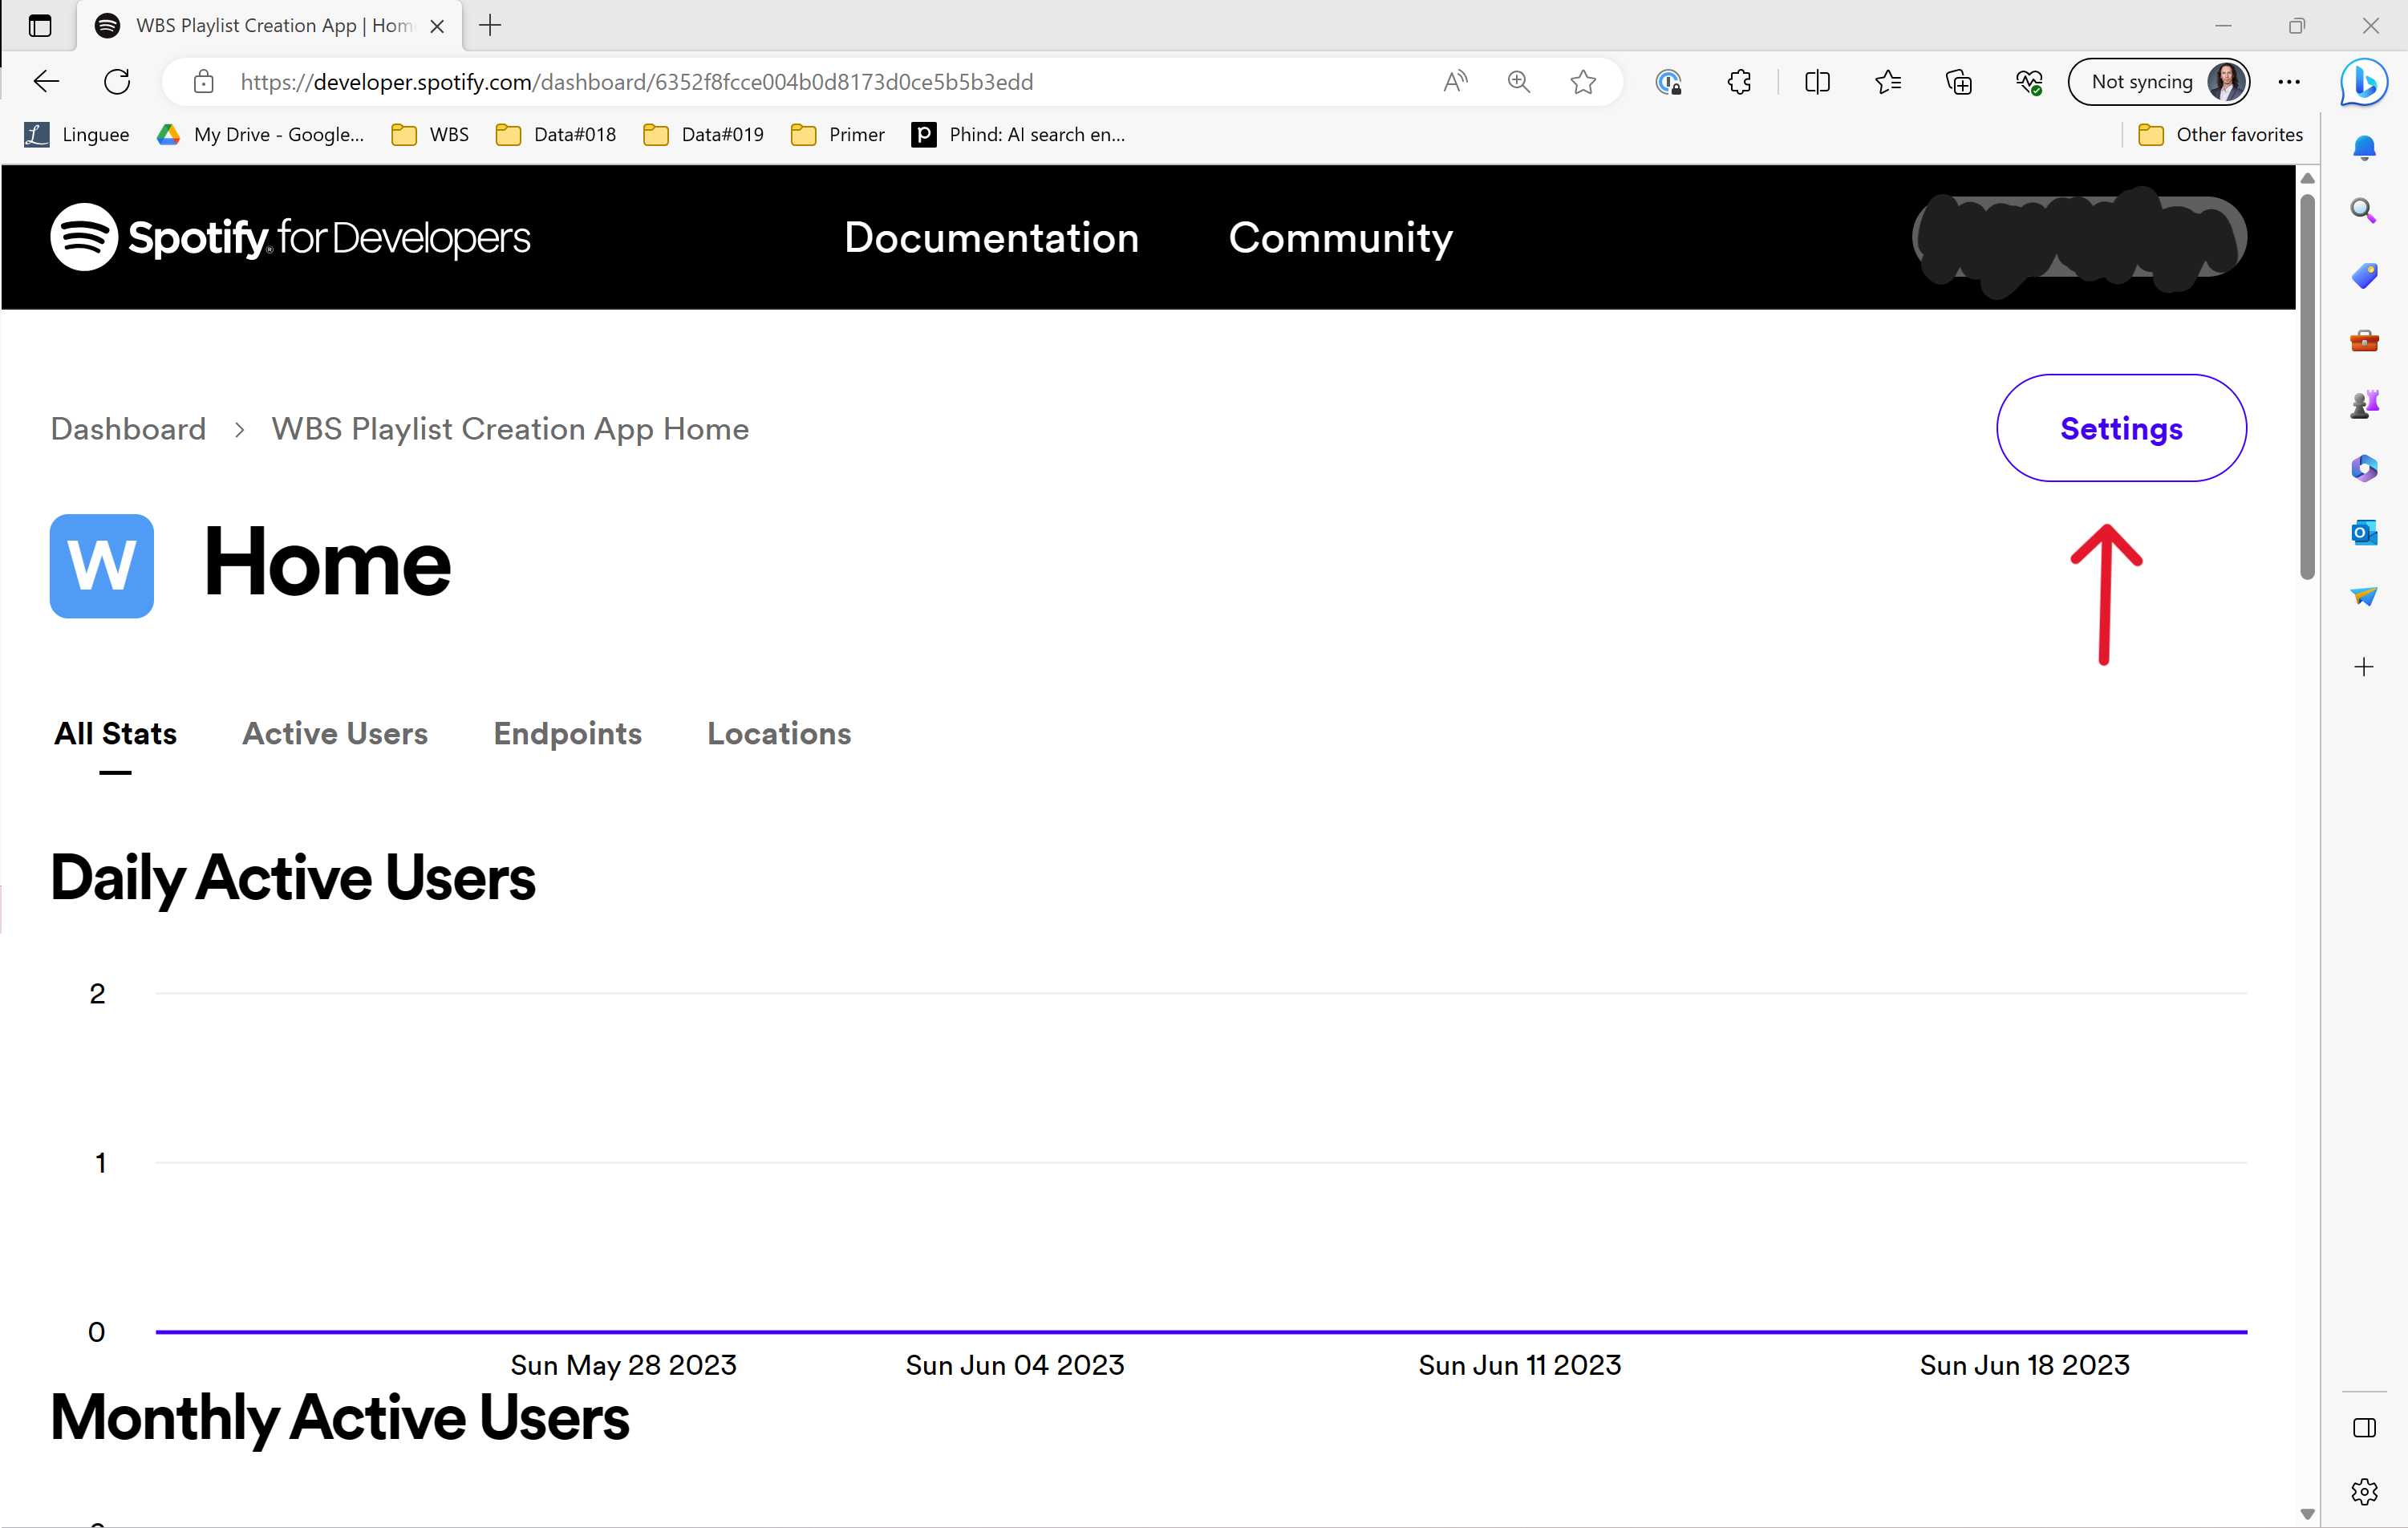

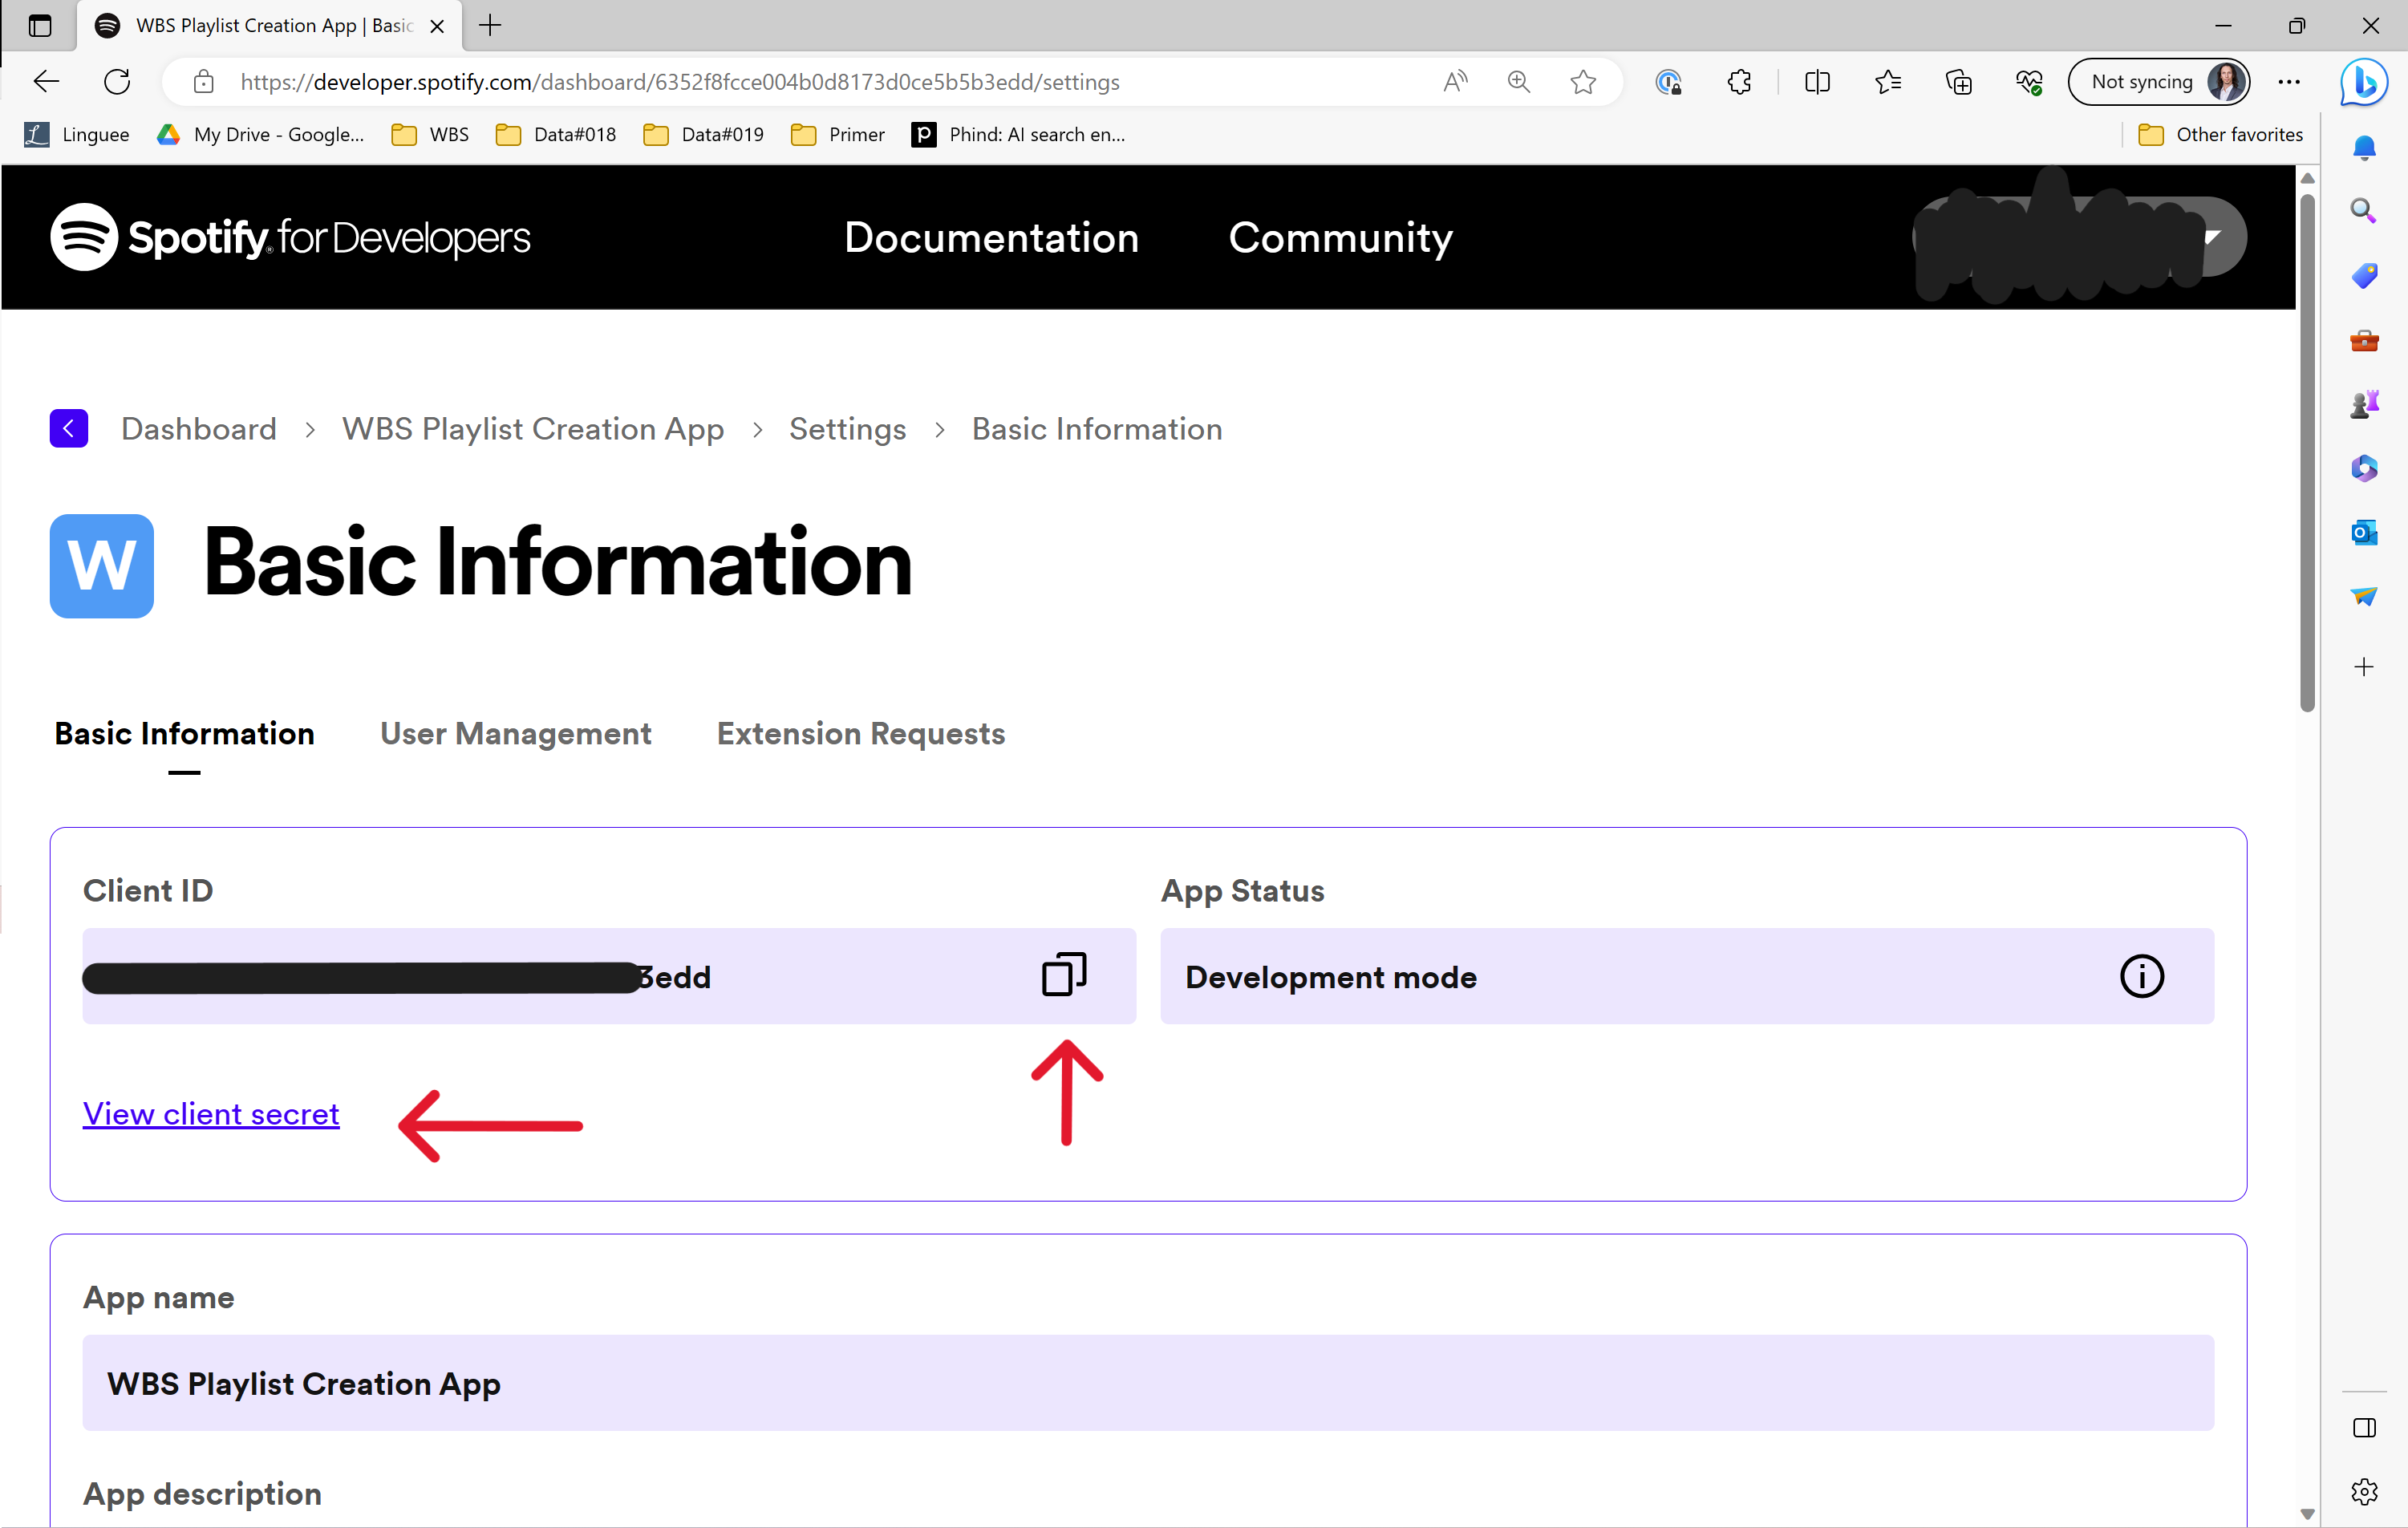

Finally, we navigate over to [Spotify Web](https://open.spotify.com/) (not the developer site) and click the profile icon in the upper right to get our `Username`. This might be the name normally displayed, like `wbsLovesMusic`, or it may be a random hash of letters and numbers.

With all of this info saved, we are ready to post our first playlist.

In [ ]:
# !pip install spotipy
# OR
# !conda install -c conda-forge spotipy

In [ ]:
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
import keys_MFC

In [ ]:
scope = 'playlist-modify-public'
username = keys_MFC.username
redirectUri = keys_MFC.redirect_uri
client_id = keys_MFC.client_id
client_secret = keys_MFC.client_secret

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [ ]:
playlist_collection = {}
for i in range(1):
    playlist_name = f'my_playlist_cluster_{i}'
    playlist_description= 'this is a test list'
    playlist_id = spotifyObject.user_playlist_create(user=username,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    id_list = list(labeled_songs.loc[labeled_songs["cluster"] == i]
                                .sample(5)
                                .id)
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
    spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=uris)
    playlist_collection[playlist_name] = playlist_id

In [ ]:
with open("./playlists.pkl", "wb") as f:
    pickle.dump(playlist_collection, f)
from google.colab import files
files.download("./playlists.pkl")

# Later iterations

As successive iterations of the model are refined, you may wish to repopulate your lists, rather than creating an unending legion of new ones.

It is important in this case to save the `playlist_id`s created above, either as a pickled object or written to a text file.

In [ ]:
import pandas as pd
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
import keys_MFC

In [ ]:
url = "https://drive.google.com/file/d/1Q32l5eGrprLgqZ4mRLStNn3VFXeO4A0M/view?usp=drive_link"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
songs = pd.read_csv(path)
songs.columns = songs.columns.str.strip()
songs = songs.drop("type", axis=1)
songs

In [ ]:
scope = 'playlist-modify-public'
username = keys_MFC.username
redirectUri = keys_MFC.redirect_uri
client_id = keys_MFC.client_id
client_secret = keys_MFC.client_secret

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [ ]:
with open("./playlists.pkl", "rb") as f:
    playlist_collection = pickle.load(f)
uris = [f'spotify:track:{str(id).strip()}' for id in songs.sample(10).id]
playlist_id = playlist_collection["my_playlist_cluster_0"]
spotifyObject.user_playlist_replace_tracks(user=username, playlist_id=playlist_id, tracks=uris)